In [2]:
#importing the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns

  Using cached seaborn-0.10.1-py3-none-any.whl (215 kB)


# Data Preparation
Here, I read in the datasets into my code file and work towards cleaning the data. This involves droping certain columns I don't need and adding columns I think will help make my work easier. I also print certain of the data to make sure its in the form i want.

In [5]:
#reading in the data
!pip install xlrd
current_emp = pd.read_excel('data.xlsx', sheet_name = 'Existing employees')
ex_emp = pd.read_excel('data.xlsx', sheet_name = 'Employees who have left')

In [6]:
#printing the heads of the current_emp() data
current_emp.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [7]:
#printing the heads of the current_emp() data
ex_emp.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low



# Exploratory Data Analysis
Here, I seek to gain in-depth knowledge and understanding of the data and problem. I use numerous python methods and functions to exploer all aspects of the data I have.

In [8]:
#checking the data
current_emp.isnull().sum()

Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

In [9]:
current_emp.shape

(11428, 10)

In [10]:
ex_emp.isnull().sum()


Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

In [11]:
ex_emp.shape


(3571, 10)

In [12]:
current_emp.columns


Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

In [13]:
ex_emp.columns


Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

In [14]:
#now we add a new column called 'emp_status' to both data
#all current employees will have the value 'current'
#all ex-employees will have the value 'ex'
current_emp['emp_status'] = 'current'
ex_emp['emp_status'] = 'ex'

In [15]:
current_emp.columns


Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary', 'emp_status'],
      dtype='object')

In [16]:
ex_emp.columns


Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary', 'emp_status'],
      dtype='object')

In [17]:
#joining the datasets
data_join = [current_emp, ex_emp]

In [18]:
all_emp = pd.concat(data_join)


In [19]:
all_emp


,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,emp_status
0,2001,0.58,0.74,4,215,3,0,0,sales,low,current
1,2002,0.82,0.67,2,202,3,0,0,sales,low,current
2,2003,0.45,0.69,5,193,3,0,0,sales,low,current
3,2004,0.78,0.82,5,247,3,0,0,sales,low,current
4,2005,0.49,0.60,3,214,2,0,0,sales,low,current
...,...,...,...,...,...,...,...,...,...,...,...
3566,14995,0.40,0.57,2,151,3,0,0,support,low,ex
3567,14996,0.37,0.48,2,160,3,0,0,support,low,ex
3568,14997,0.37,0.53,2,143,3,0,0,support,low,ex
3569,14998,0.11,0.96,6,280,4,0,0,support,low,ex


In [20]:
all_emp.isnull().sum()


Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
emp_status               0
dtype: int64

In [21]:
all_emp.shape


(14999, 11)

In [22]:
#since worinking with the employee id is stressful, i drop it
all_emp.drop('Emp ID', inplace = True, axis = 1)

In [23]:
all_emp.isnull().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
emp_status               0
dtype: int64

# Correlation matrix
here, I seek to find out the correlation of data fron both data sets using a pairplot correlation marix and a correlation heatmap

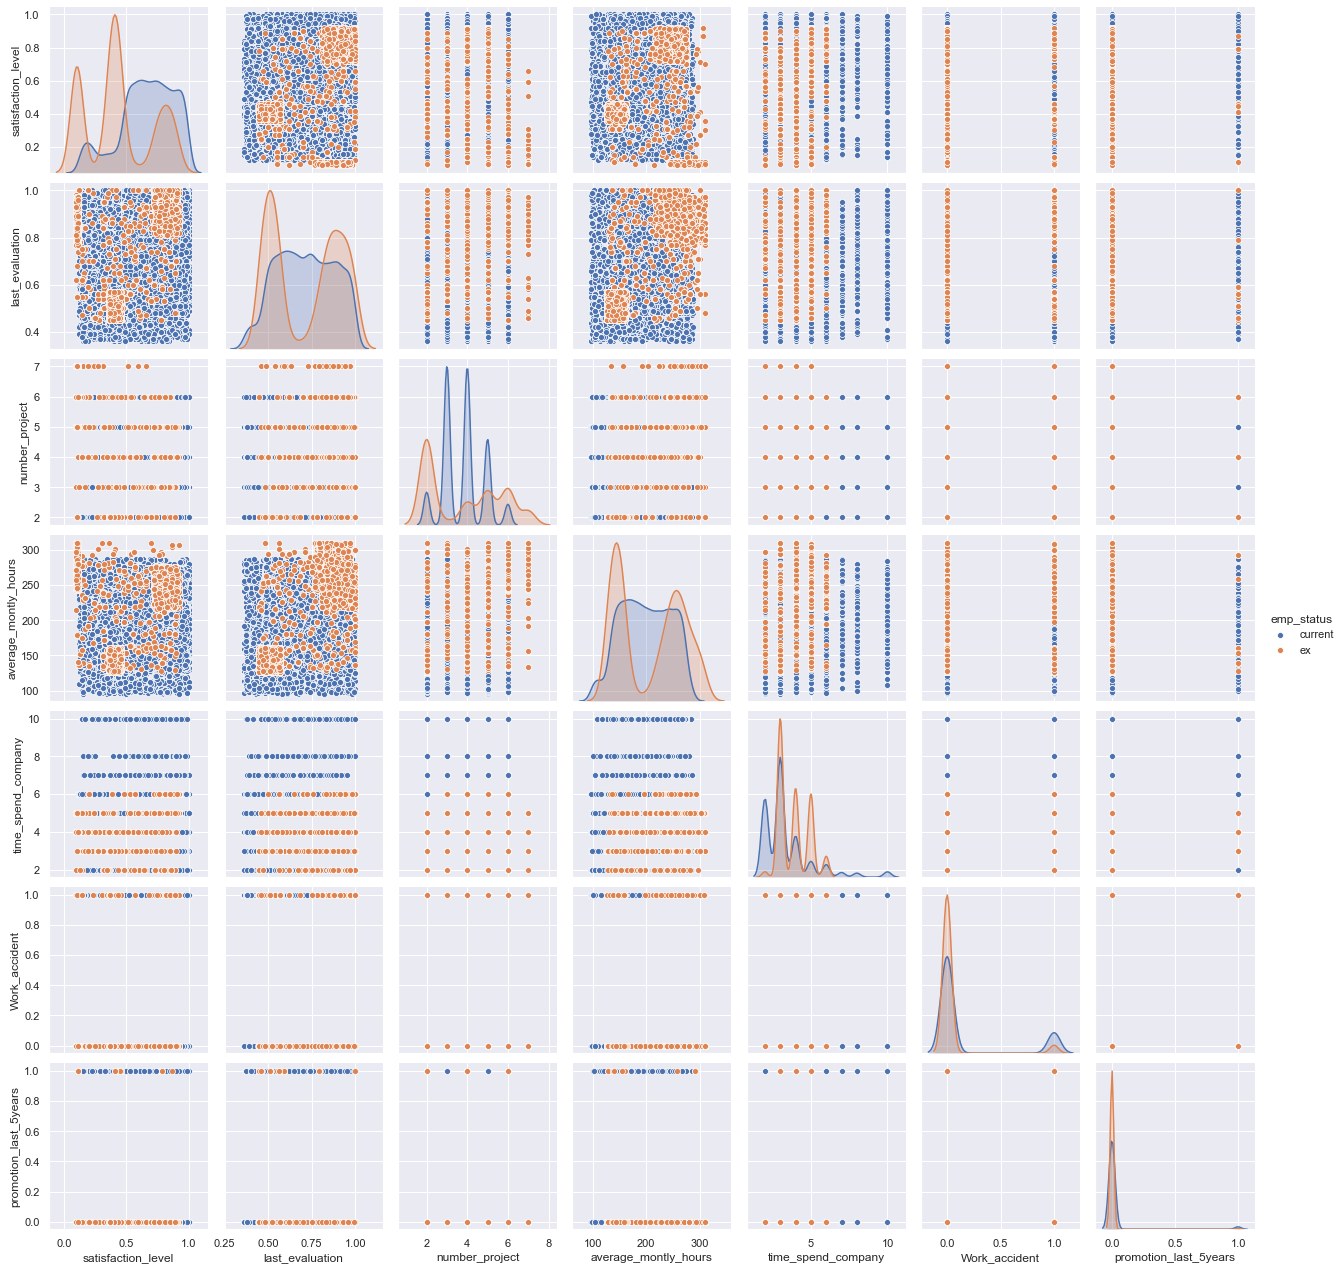

In [26]:
#plotting a correlation matrix to compare the values of the joined data
sns.set(rc={'figure.figsize':(30.7,8.27)})
g = sns.pairplot(all_emp, hue = 'emp_status');
plt.savefig('CorrelationPairPlot.png')

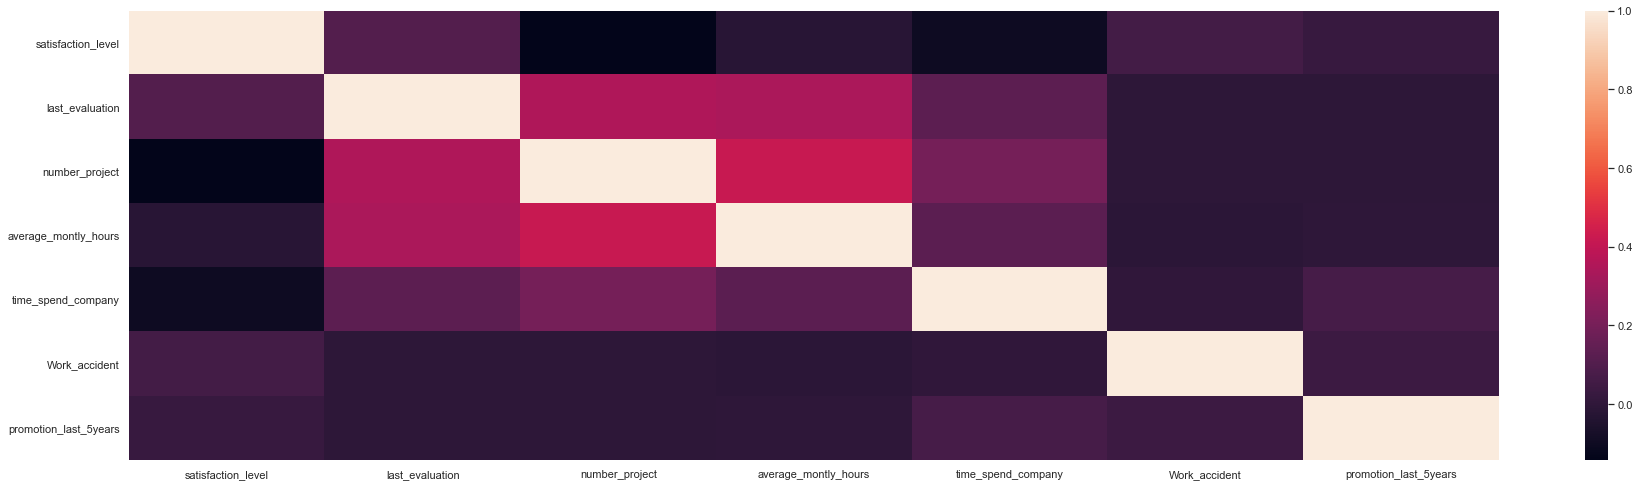

In [27]:
sns.heatmap(all_emp.corr())
plt.savefig('CorrelationHeatmap.png')

# Data Visualization
Here I seek to notice and understand factors of employee attrition by visualizing data and noticing certain trands from the data

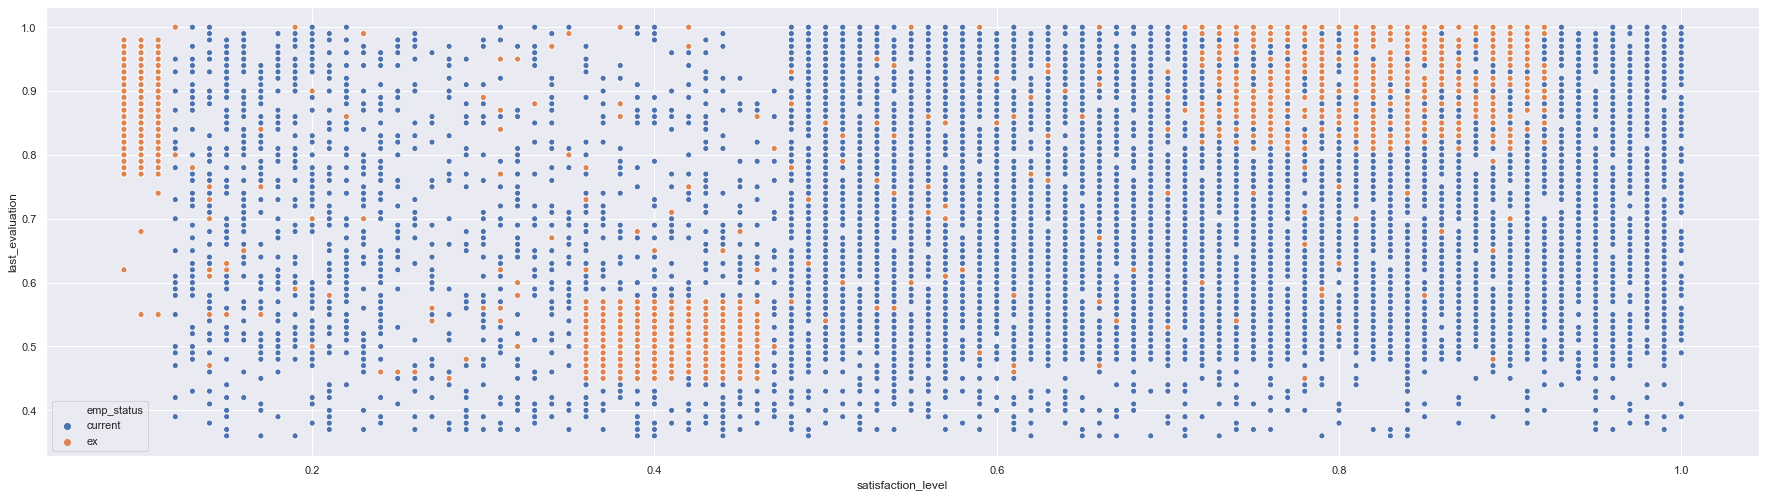

In [28]:
sns.scatterplot(x=all_emp["satisfaction_level"], y=all_emp["last_evaluation"], hue=all_emp["emp_status"])
plt.savefig('Satisfaction-Last_eval.png')

from the scatter plot above, we can tell that current employees tend to have higher satisfaction and more frequent evaluations as compared to ex-employees



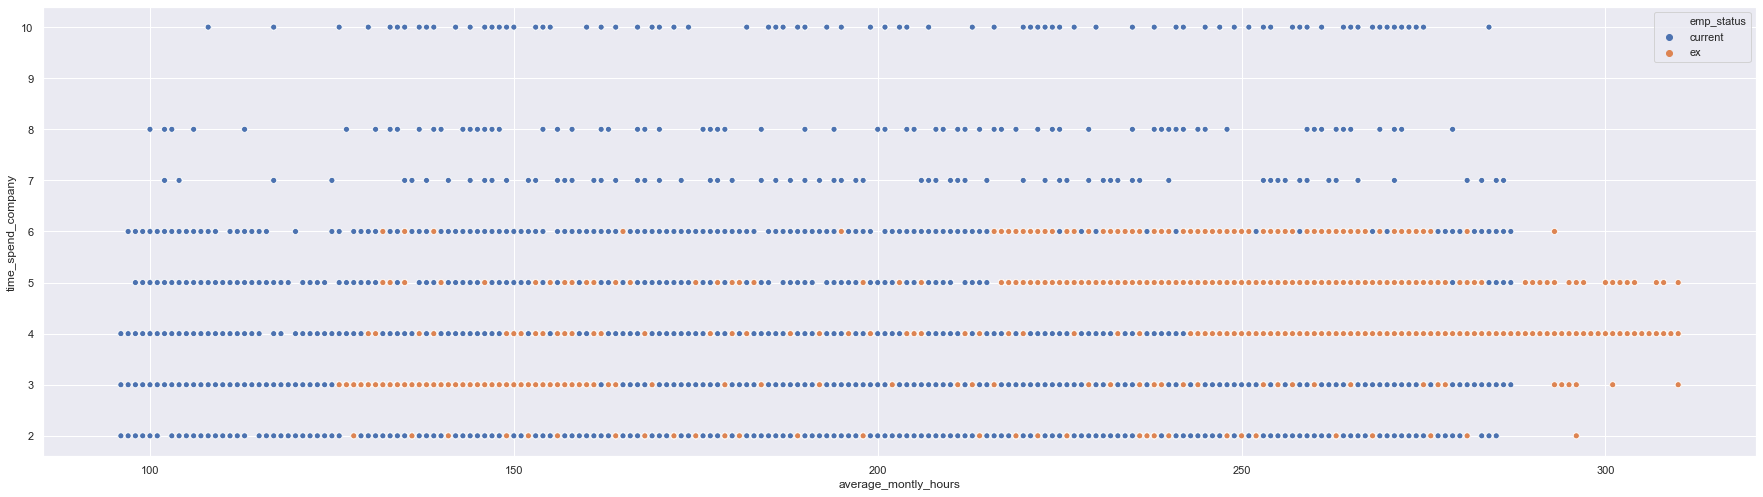

In [29]:
sns.scatterplot(x=all_emp["average_montly_hours"],y=all_emp["time_spend_company"],hue=all_emp["emp_status"])
plt.savefig('avg_hours-time_spent.png')

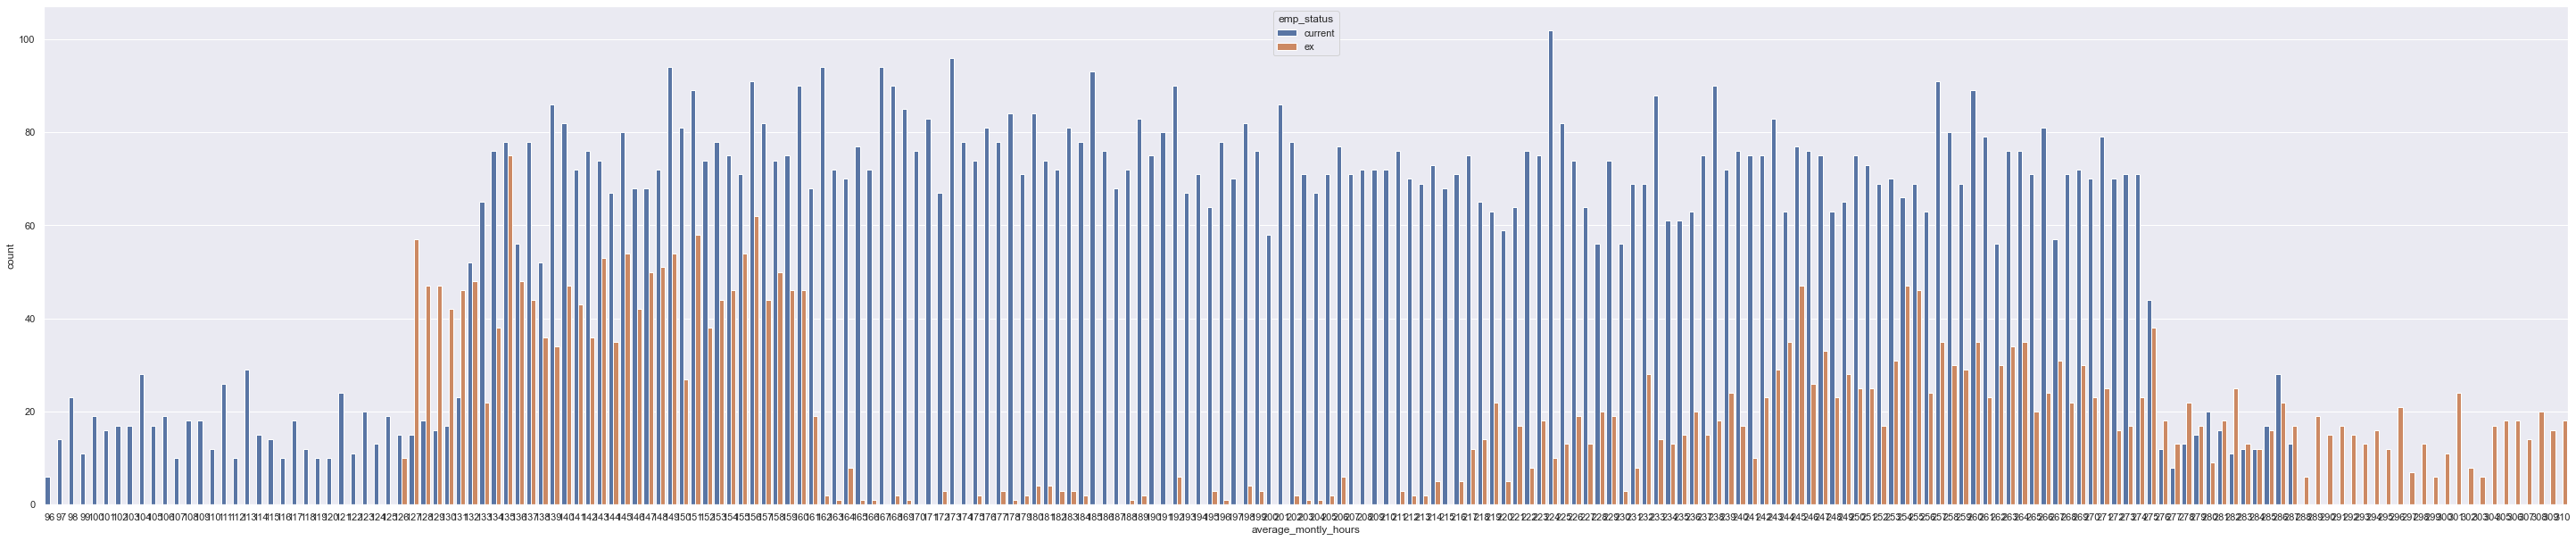

In [30]:
sns.set(rc={'figure.figsize':(50.7,10.27)})
sns.countplot(all_emp["average_montly_hours"], hue=all_emp["emp_status"])
plt.savefig('average_monthly_hours.png')

In [31]:
all_emp['average_montly_hours'].max()

310

In [32]:
all_emp['average_montly_hours'].min()

96

In [33]:
all_emp.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary', 'emp_status'],
      dtype='object')

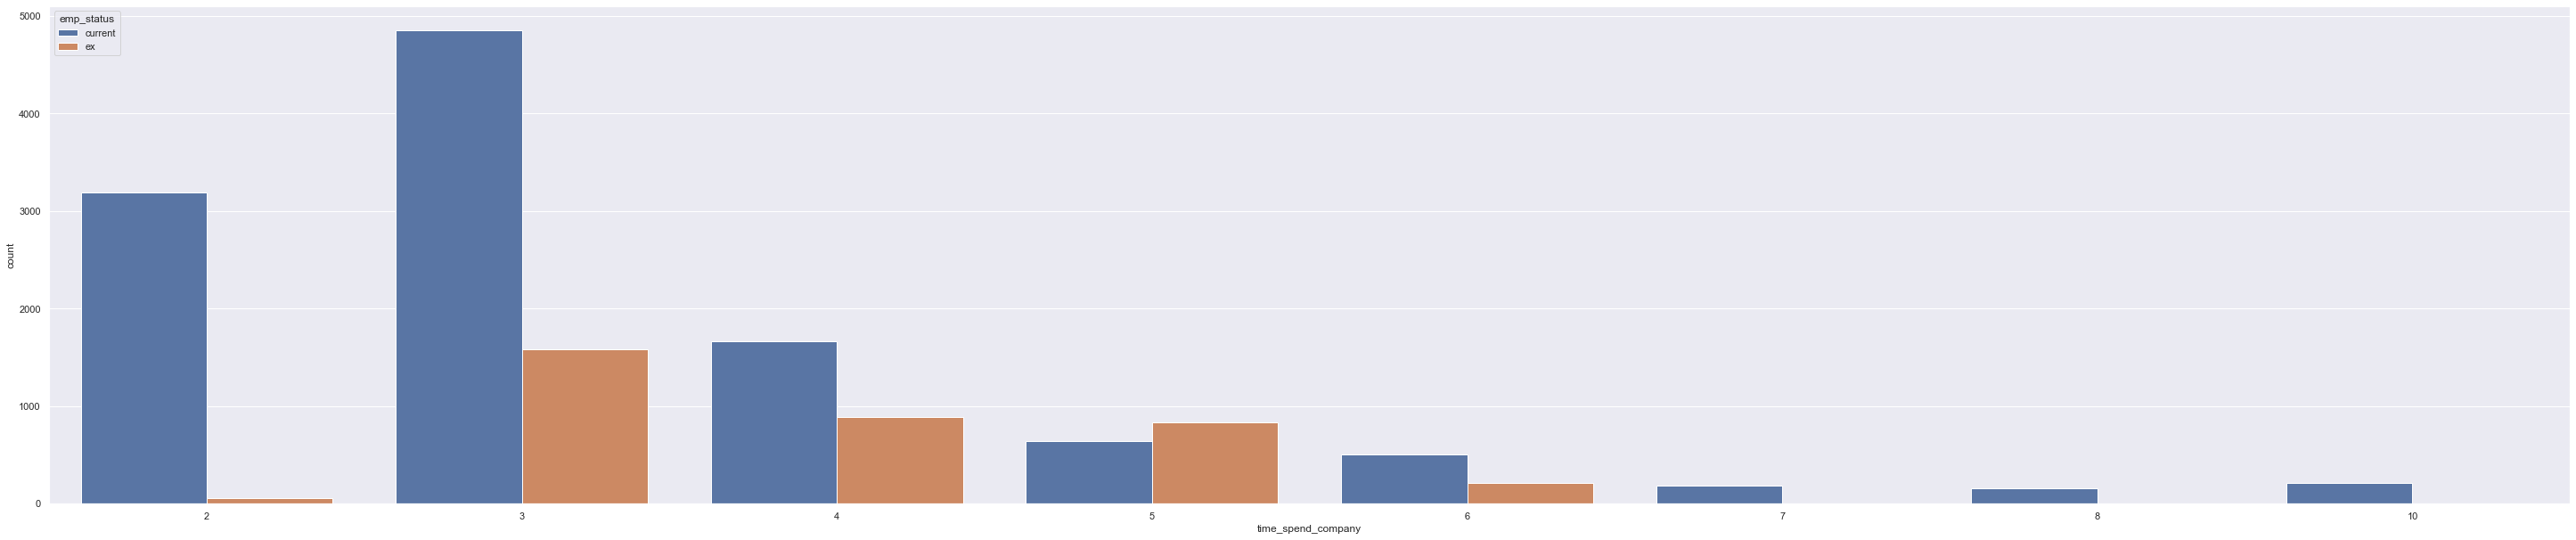

In [34]:
sns.countplot(all_emp['time_spend_company'], hue = all_emp['emp_status'])
plt.savefig('time_spent.png')

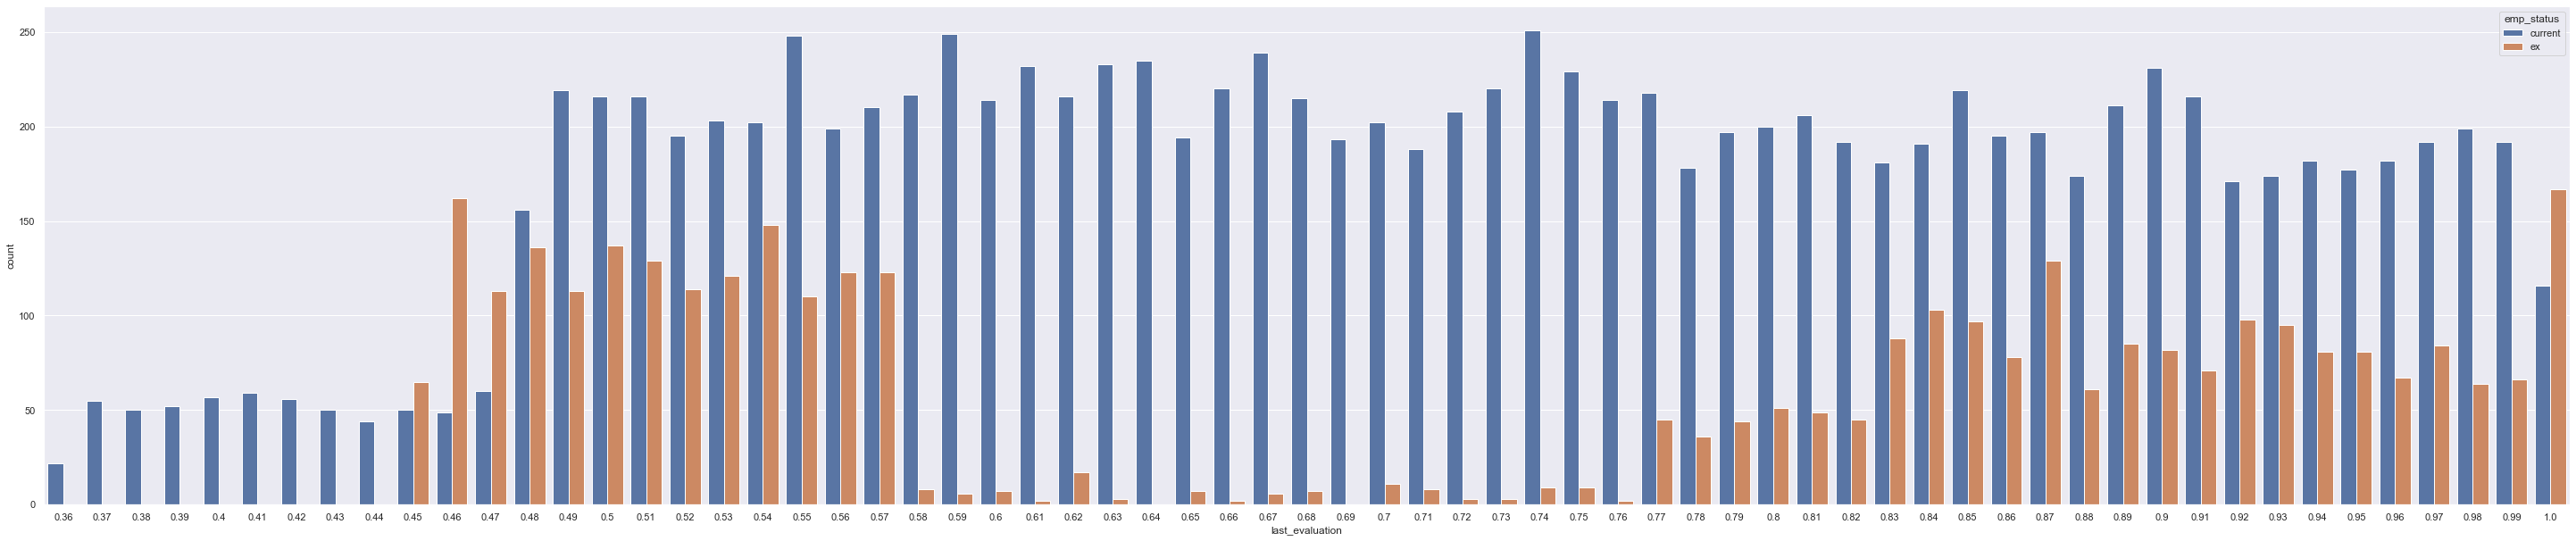

In [35]:
sns.countplot(all_emp['last_evaluation'], hue = all_emp['emp_status'])
plt.savefig('last_eval.png')


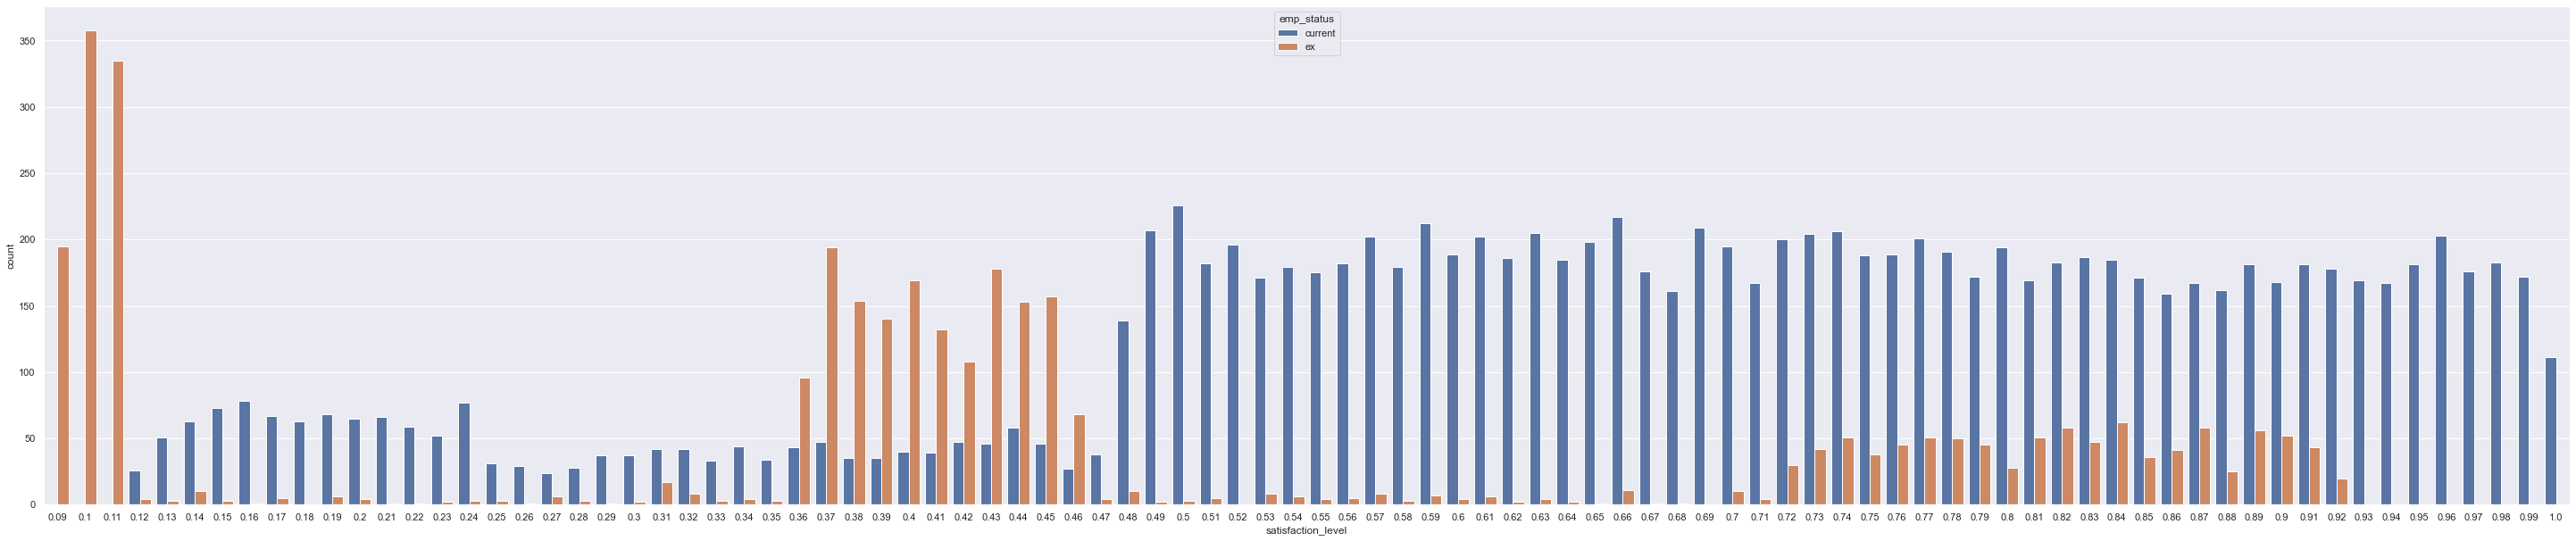

In [36]:
sns.countplot(all_emp['satisfaction_level'], hue = all_emp['emp_status'])
plt.savefig('satisfaction_level.png')


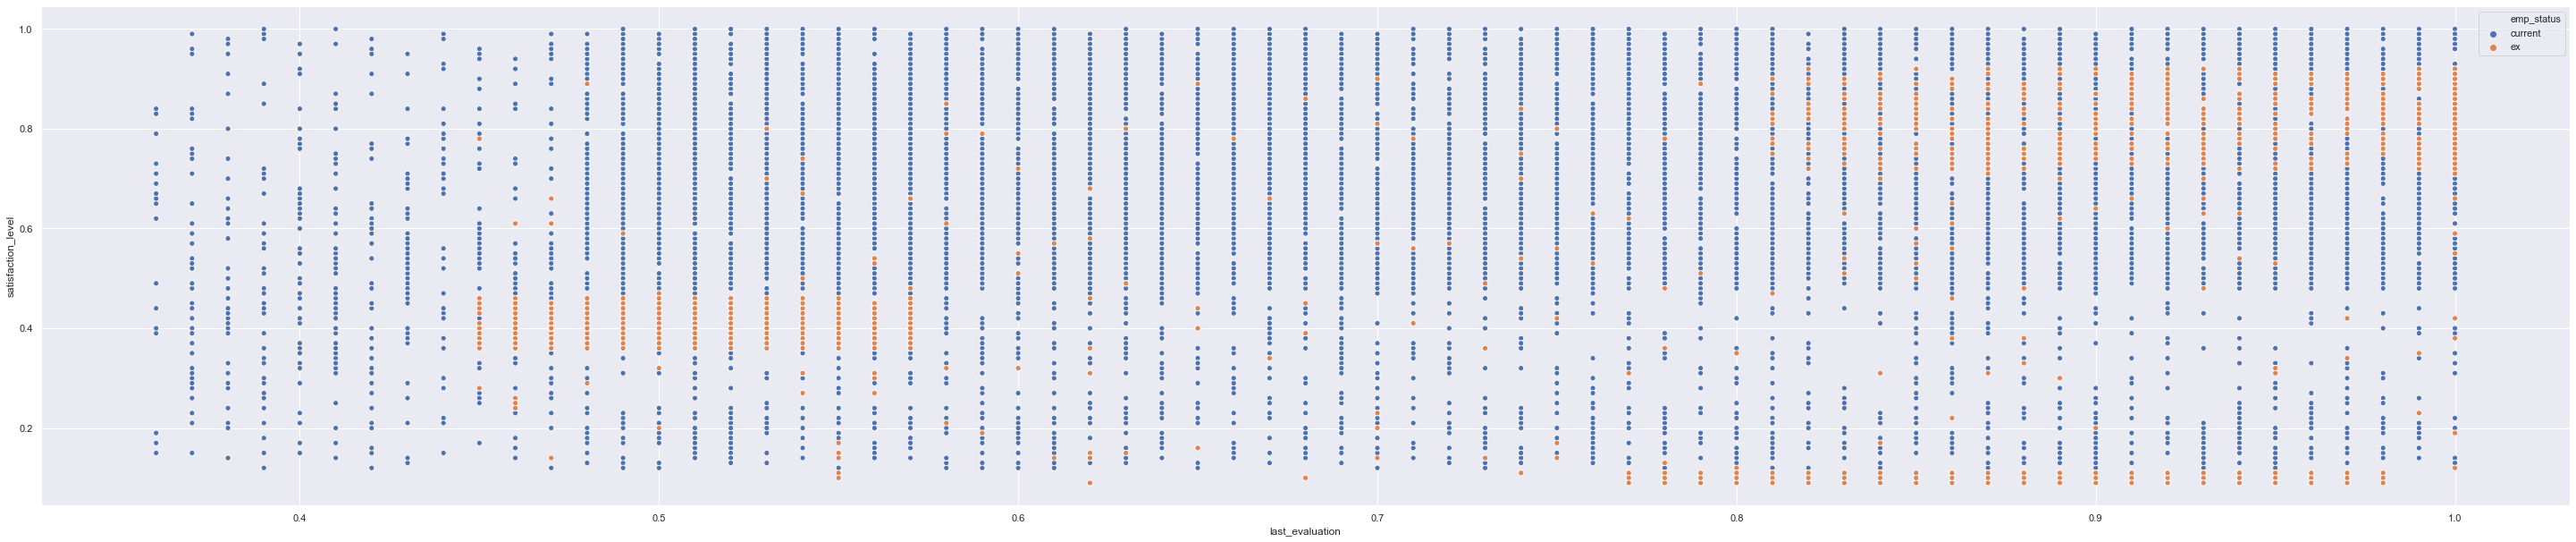

In [37]:
sns.scatterplot(x=all_emp['last_evaluation'], y=all_emp['satisfaction_level'], hue= all_emp['emp_status'])
